<a href="https://colab.research.google.com/github/felipecacique/Pytorch-Tutorial-Youtube/blob/main/notebook9d35603363.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [29]:

# # IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES
# # TO THE CORRECT LOCATION (/kaggle/input) IN YOUR NOTEBOOK,
# # THEN FEEL FREE TO DELETE THIS CELL.
# # NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# # ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# # NOTEBOOK.

# import os
# import sys
# from tempfile import NamedTemporaryFile
# from urllib.request import urlopen
# from urllib.parse import unquote, urlparse
# from urllib.error import HTTPError
# from zipfile import ZipFile
# import tarfile
# import shutil

# CHUNK_SIZE = 40960
# DATA_SOURCE_MAPPING = 'animals10:https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-data-sets%2F59760%2F840806%2Fbundle%2Farchive.zip%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20240420%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20240420T153151Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3Da8384c24d5feac039c59bb107116768b0fdd94bd42e95abc40051a3c798870c6d96598bb3a9442642a1aef9212116f675468f91f0449af7f7daa7857b14c9dc94aee65d524f8b4ebcc38fb01189076b8ac768f49ef8d0674c54224e293568e6cbf2c668f714139c335d511fd63de2ee2a15ef95b86d4742d2924b0a74ca84aa4bbaffb6cd53f54f765c651cf687b03cc587d857563cd11ea94b2d1a70bd788c0f6d5a156aac15958941309c1b6b107f1817df4f0dbb74f6b0f17bbc5457ff5a357907da2307024f0f30f7c592f5990500ab49185a7f172027f3eddf6ef7c12bc5495f56ad465059526d1cbd977f0349a8385aa34c87367cf36f0a67a4214028d'

# KAGGLE_INPUT_PATH='/kaggle/input'
# KAGGLE_WORKING_PATH='/kaggle/working'
# KAGGLE_SYMLINK='kaggle'

# !umount /kaggle/input/ 2> /dev/null
# shutil.rmtree('/kaggle/input', ignore_errors=True)
# os.makedirs(KAGGLE_INPUT_PATH, 0o777, exist_ok=True)
# os.makedirs(KAGGLE_WORKING_PATH, 0o777, exist_ok=True)

# try:
#   os.symlink(KAGGLE_INPUT_PATH, os.path.join("..", 'input'), target_is_directory=True)
# except FileExistsError:
#   pass
# try:
#   os.symlink(KAGGLE_WORKING_PATH, os.path.join("..", 'working'), target_is_directory=True)
# except FileExistsError:
#   pass

# for data_source_mapping in DATA_SOURCE_MAPPING.split(','):
#     directory, download_url_encoded = data_source_mapping.split(':')
#     download_url = unquote(download_url_encoded)
#     filename = urlparse(download_url).path
#     destination_path = os.path.join(KAGGLE_INPUT_PATH, directory)
#     try:
#         with urlopen(download_url) as fileres, NamedTemporaryFile() as tfile:
#             total_length = fileres.headers['content-length']
#             print(f'Downloading {directory}, {total_length} bytes compressed')
#             dl = 0
#             data = fileres.read(CHUNK_SIZE)
#             while len(data) > 0:
#                 dl += len(data)
#                 tfile.write(data)
#                 done = int(50 * dl / int(total_length))
#                 sys.stdout.write(f"\r[{'=' * done}{' ' * (50-done)}] {dl} bytes downloaded")
#                 sys.stdout.flush()
#                 data = fileres.read(CHUNK_SIZE)
#             if filename.endswith('.zip'):
#               with ZipFile(tfile) as zfile:
#                 zfile.extractall(destination_path)
#             else:
#               with tarfile.open(tfile.name) as tarfile:
#                 tarfile.extractall(destination_path)
#             print(f'\nDownloaded and uncompressed: {directory}')
#     except HTTPError as e:
#         print(f'Failed to load (likely expired) {download_url} to path {destination_path}')
#         continue
#     except OSError as e:
#         print(f'Failed to load {download_url} to path {destination_path}')
#         continue

# print('Data source import complete.')


In [30]:
# # This Python 3 environment comes with many helpful analytics libraries installed
# # It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# # For example, here's several helpful packages to load

# import numpy as np # linear algebra
# import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# # Input data files are available in the read-only "../input/" directory
# # For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

# import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

# # You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# # You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [31]:
import torch
import torch.nn as nn
from torchvision.transforms import v2
from torch.utils.data import Dataset, DataLoader
import glob
import random
from PIL import Image
from tqdm import tqdm
from collections import defaultdict

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [32]:
classes_dict = {
      "cane": "dog",
      "cavallo": "horse",
      "elefante": "elephant",
      "farfalla": "butterfly",
      "gallina": "chicken",
      "gatto": "cat",
      "mucca": "cow",
      "pecora": "sheep",
      "scoiattolo": "squirrel",
      "dog": "cane",
      "cavallo": "horse",
      "elephant" : "elefante",
      "butterfly": "farfalla",
      "chicken": "gallina",
      "cat": "gatto",
      "cow": "mucca",
      "spider": "ragno",
      "squirrel": "scoiattolo"
}

classes = ["dog", "horse", "elephant", "butterfly", "chicken", "cat", "cow", "sheep", "spider", "squirrel"]

data = {
    "path": [],
    "label": []
}

data_dir = "/kaggle/input/animals10/raw-img"

In [33]:
# Loading data
for label_it, label_en in classes_dict.items():
  paths = glob.glob(f'{data_dir}/{label_it}/*.jpeg')

  data["path"].extend(paths)
  data["label"].extend([label_en] * len(paths))

df_data = pd.DataFrame(data)
df_data.head()

,path,label
0,/kaggle/input/animals10/raw-img/cane/OIP-ugSBK...,dog
1,/kaggle/input/animals10/raw-img/cane/OIP-L5BqW...,dog
2,/kaggle/input/animals10/raw-img/cane/OIP-fJYov...,dog
3,/kaggle/input/animals10/raw-img/cane/OIP-CQMji...,dog
4,/kaggle/input/animals10/raw-img/cane/OIP-JfaUM...,dog


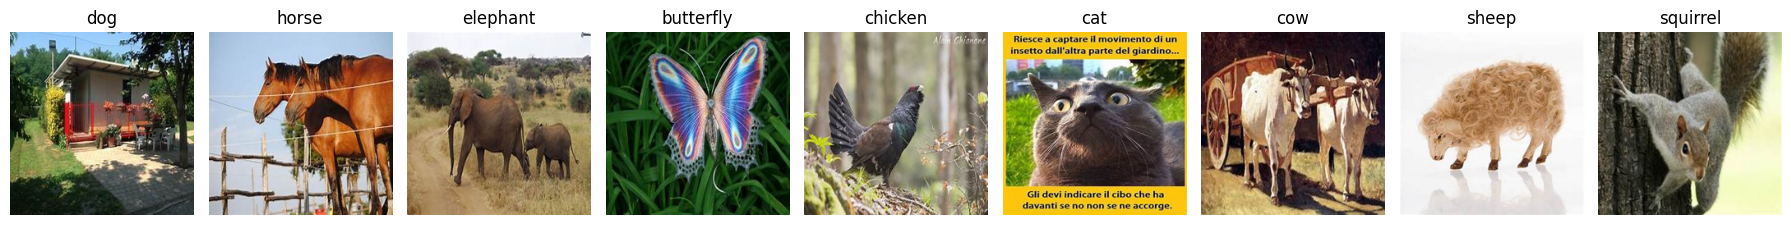

In [34]:
# Visualize data
plt.figure(figsize = (20, 7))

for idx, i in enumerate(df_data.label.unique()):
  plt.subplot(1, 10, idx + 1)
  df = df_data[df_data['label'] == i].reset_index(drop=True)

  image_path = df.loc[random.randint(0,len(df)-1), 'path']
  img = Image.open(image_path)
  img = img.resize((224, 224))
  plt.imshow(img)
  plt.axis('off')
  plt.title(i)

plt.tight_layout()
plt.show()


In [36]:
# Data augmentation and data normalization
test_tfm = v2.Compose([
    v2.Resize((224,224)),
    v2.ToTensor(),
    # v2.Compose([v2.ToImage(), v2.ToDtype(torch.float32, scale=True)]),
    v2.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

train_tfm = v2.Compose([
    v2.Resize((224,224)),
    v2.ToTensor(),
    # v2.Compose([v2.ToImage(), v2.ToDtype(torch.float32, scale=True)]),
    v2.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])


In [37]:
# Create Dataset with pytorch
class AnimalDataset(Dataset):

  def __init__(self, path_lst, label_lst, tfm):
    super(AnimalDataset).__init__()
    self.path_lst = path_lst
    self.label_lst = label_lst
    self.transform = tfm

  def __len__(self):
    return len(self.path_lst)

  def __getitem__(self, idx):
    img = Image.open(fname)
    img = self.transform(img)
    return img, label
